Trong bài toán này, chúng ta sẽ được cho một bộ dataset mô tả thông tin về các batch của 1 loại rượu đỏ ở Bồ Đào Nha, bao gồm các features liên quan đến tính chất của rượu như: nồng độ acid, độ đường, độ pH,... Nhiệm vụ của chúng ta là phân tích, xử lí bộ data dưới đây và trả lời các câu hỏi yêu cầu người làm phải thực hiện coding. Đây là một bài toán phân loại với 11 features đầu vào và 1 feature đầu ra là chất lượng của rượu (từ 0 đến 10).
[winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

# **Thực hiện các yêu cầu sau đây**

1. **Đọc dữ liệu**
- Sử dụng pandas, đọc file csv được cung cấp, sau đó hiển thị ra màn hỉnh để hiểu các trường dữ liệu.

2. **Tách dữ liệu thành bộ feature (X) và label (y)**
- Sử dụng các cột "fixed acidity", "volatile acidity", "citric acid",... làm features đầu vào (`X`).
- Sử dụng cột "quality" làm biến đầu ra (`y`).

3. **Tách tập dữ liệu thành tập train và test**  
- Chia dữ liệu thành tập huấn luyện (`X_train`, `y_train`) và tập kiểm tra (`X_test`, `y_test`) với tỷ lệ `80:20`.
- Đảm bảo rằng việc chia tách dữ liệu là ngẫu nhiên nhưng tái lập (reproducibility) được với `random_state=42`

**Lưu ý:** Sử dụng các mô hình regressor trong sklearn để thực hiện đề bài này.

# Thư viện

In [16]:
# !pip install pandas scikit-learn

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Tải và đọc dữ liệu

In [18]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Tiền xử lý

In [21]:
features = df.drop('quality', axis=1)
labels = df['quality']
# Chia tập dữ liệu thành tập train và test với tỉ lệ (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [22]:
print(f"Train set head: {X_train.head()}")

Train set head:      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493            8.7             0.690         0.31             3.0      0.086   
354            6.1             0.210         0.40             1.4      0.066   
342           10.9             0.390         0.47             1.8      0.118   
834            8.8             0.685         0.26             1.6      0.088   
705            8.4             1.035         0.15             6.0      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                 23.0                  81.0  1.00020  3.48       0.74   
354                 40.5                 165.0  0.99120  3.25       0.59   
342                  6.0                  14.0  0.99820  3.30       0.75   
834                 16.0                  23.0  0.99694  3.32       0.47   
705                 11.0                  54.0  0.99900  3.37       0.49   

     alcohol  
493     11.6  
354     11.9  
3

In [23]:
print(f"Train label head: \n{y_train.head()}")

Train label head: 
493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64


# Khởi tạo các tham số của mô hình Random Forest

In [24]:
# Định nghĩa các tham số cho mô hình Random Forest
settings = {
    'n_estimators': 50,         # Số lượng cây trong rừng
    # 'max_depth': 3,             # Độ sâu tối đa của mỗi cây
    # 'min_samples_split': 2,     # Số lượng mẫu tối thiểu để chia nhánh
    # 'min_samples_leaf': 1,      # Số lượng mẫu tối thiểu tại mỗi nút lá
    'random_state': 42          # Giá trị ngẫu nhiên để đảm bảo kết quả lặp lại
}

# Huấn luyện mô hình

In [26]:
forest = RandomForestRegressor(**settings) # Khởi tạo mô hình Random Forest với các tham số đã định nghĩa
forest.fit(X_train, y_train) # Huấn luyện mô hình trên tập huấn luyện

RandomForestRegressor(n_estimators=50, random_state=42)

# Đánh giá mô hình Random Forest

In [10]:
# Đánh giá mô hình với MSE và R2
# MSE: càng nhỏ càng tốt
# R2: càng gần 1 càng tốt
predictions = forest.predict(X_test)
# TODO: Tính toán MSE và R2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MSE: 0.3062
R2: 0.5314


# Thử nghiệm Number of Trees (n_estimators)

In [27]:
from sklearn.preprocessing import StandardScaler
# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Thử nghiệm với các số lượng cây
best_mse = float('inf')
best_trees = None

for count in [10, 20, 50, 100]:
    # Tạo và huấn luyện mô hình
    model = RandomForestRegressor(n_estimators=count, random_state=42)
    model.fit(X_train_scaled, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test_scaled)
    # Tính MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"n_estimators={count}, MSE={mse:.4f}")
    # Cập nhật best_mse và best_trees
    if mse < best_mse:
        best_mse = mse
        best_trees = count

# 6. In kết quả
print(f"\nOptimal tree count: {best_trees} with MSE {best_mse:.4f}")

n_estimators=10, MSE=0.3222
n_estimators=20, MSE=0.3173
n_estimators=50, MSE=0.3050
n_estimators=100, MSE=0.3007

Optimal tree count: 100 with MSE 0.3007


# Tree Depth (Độ sâu của cây)

In [28]:
best_mse = float('inf')
best_depth = None

for depth in range(1, 11):
    # Tạo và huấn luyện mô hình
    model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=100)
    model.fit(X_train_scaled, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test_scaled)
    # Tính MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"max_depth={depth}, MSE={mse:.4f}")
    # Cập nhật best_mse và best_depth
    if mse < best_mse:
        best_mse = mse
        best_depth = depth

# 6. In kết quả
print(f"\nOptimal max_depth: {best_depth} with MSE {best_mse:.4f}")

max_depth=1, MSE=0.5073
max_depth=2, MSE=0.4497
max_depth=3, MSE=0.4146
max_depth=4, MSE=0.3915
max_depth=5, MSE=0.3756
max_depth=6, MSE=0.3591
max_depth=7, MSE=0.3503
max_depth=8, MSE=0.3389
max_depth=9, MSE=0.3277
max_depth=10, MSE=0.3276

Optimal max_depth: 10 with MSE 0.3276


⚠️ XGBoost chưa được cài đặt. Hãy cài đặt bằng: pip install xgboost
Sử dụng RandomForest thay thế để demo
🚀 XGBOOST HYPERPARAMETER TUNING VỚI RANDOMIZEDSEARCHCV
Dataset: Wine Quality
Phương pháp: RandomizedSearchCV
Siêu tham số: learning_rate, n_estimators, max_depth, subsample

1. ĐANG TẢI DỮ LIỆU...
✓ Đã tải thành công Wine Quality dataset từ UCI
Dataset shape: (1599, 12)
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target: quality (range: 3-8)

Train set: (1279, 11), Test set: (320, 11)

2. THIẾT LẬP KHÔNG GIAN TÌM KIẾM SIÊU THAM SỐ...
Không gian tìm kiếm:
  learning_rate: [0.01, 0.1, 0.2]
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 7]
  subsample: [0.6, 0.8, 1.0]

Tổng số kết hợp có thể: 81

3. THIẾT LẬP RANDOMIZEDSEARCHCV...
Cấu hình RandomizedSearchCV:
  • Số lần thử nghiệm: 20
  • Cross-validation: 3-fold
  • Scoring metric: neg_mean_squ

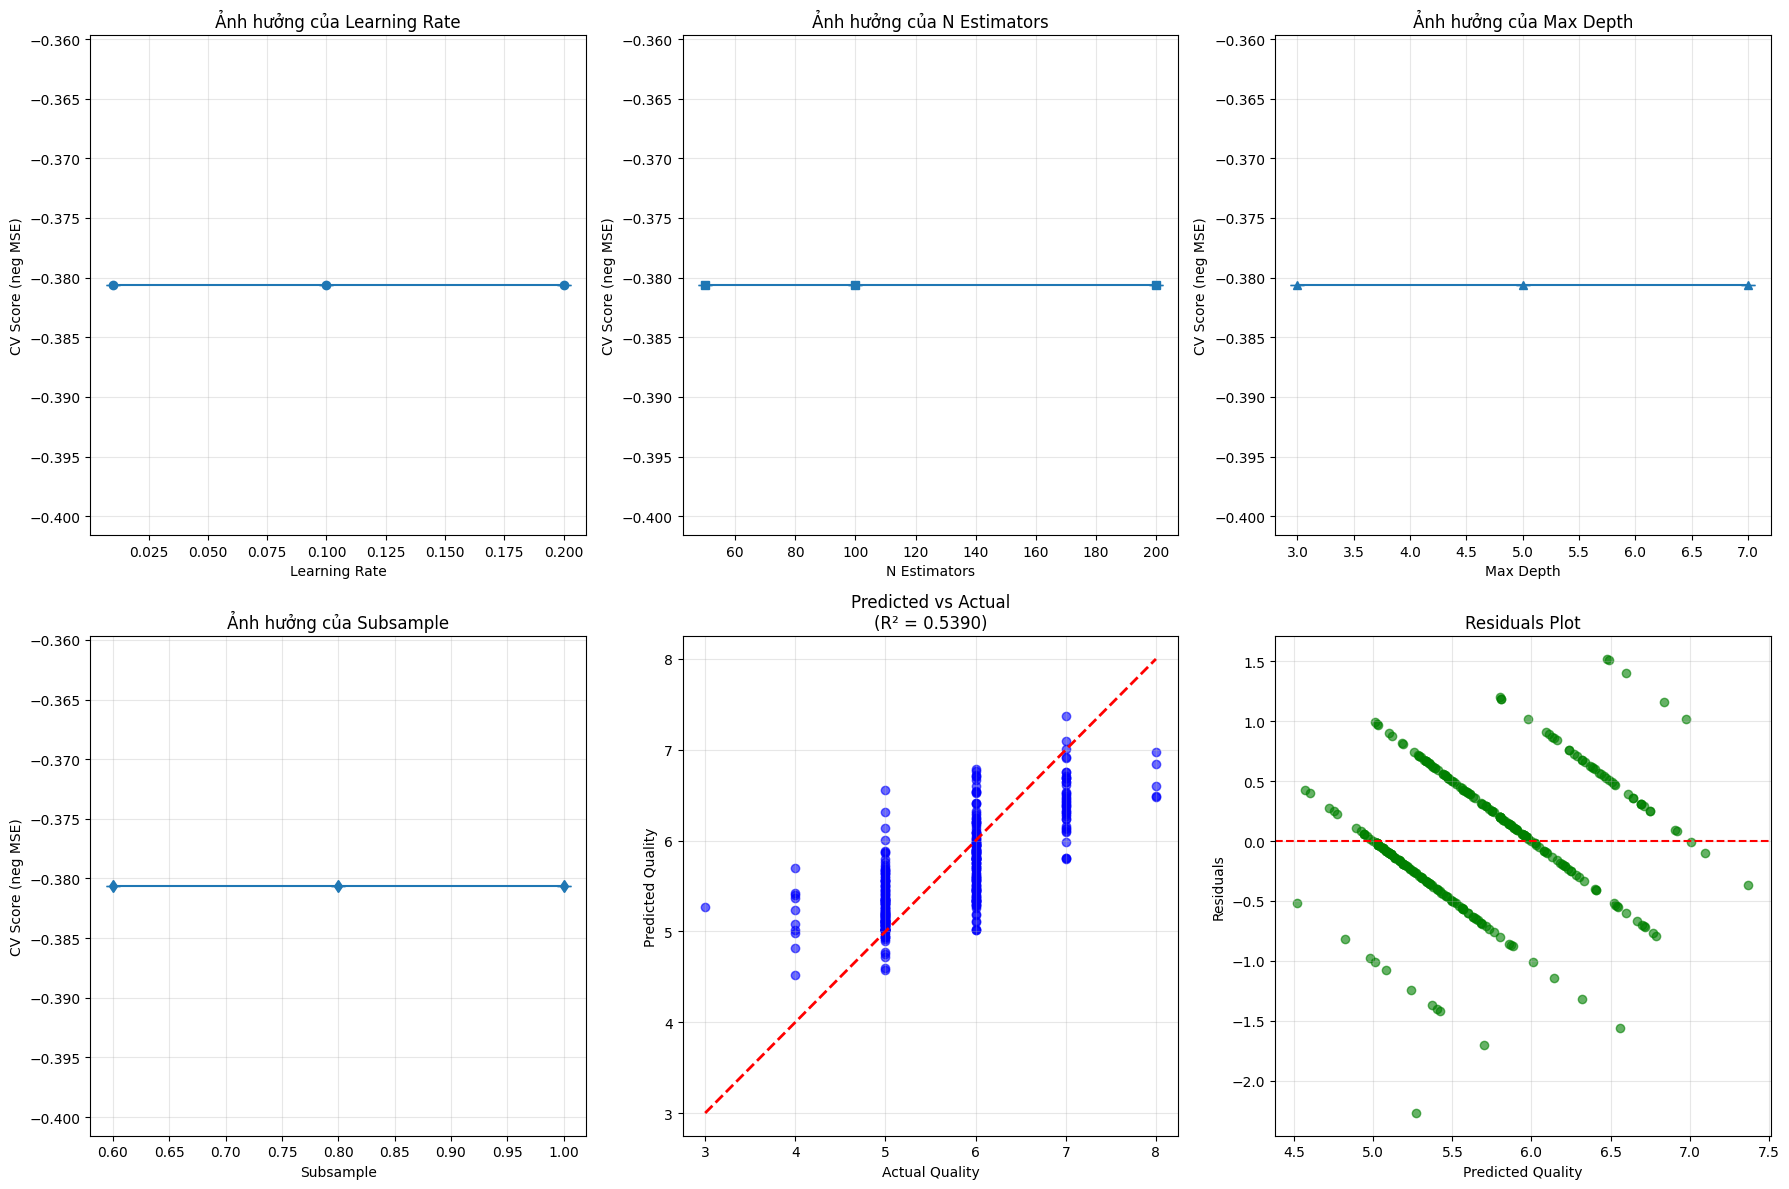

🎯 KẾT LUẬN CUỐI CÙNG
SIÊU THAM SỐ TỐI ÚU CHO XGBOOST:
--------------------------------------------------
✓ learning_rate: 0.1
✓ max_depth: 3
✓ n_estimators: 100
✓ subsample: 0.6

HIỆU SUẤT:
✓ Test MSE: 0.301238
✓ Test R²: 0.539043
✓ CV Score: 0.380632
✓ Cải thiện so với baseline: 1.63%

NHẬN XÉT:
• Learning rate trung bình (0.1) → cân bằng tốt
• Max depth thấp → mô hình đơn giản
• Subsample < 1.0 → giúp giảm overfitting

🏆 SIÊU THAM SỐ TỐI ÚU ĐÃ ĐƯỢC TÌM THẤY!


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Try to import XGBoost
try:
    from xgboost import XGBRegressor
    xgboost_available = True
    print("✓ XGBoost đã được cài đặt")
except ImportError:
    print("⚠️ XGBoost chưa được cài đặt. Hãy cài đặt bằng: pip install xgboost")
    # Tạo class thay thế để demo
    from sklearn.ensemble import RandomForestRegressor

    class XGBRegressor:
        def __init__(self, **kwargs):
            # Mapping XGBoost params to RandomForest
            rf_params = {}
            if 'n_estimators' in kwargs:
                rf_params['n_estimators'] = kwargs['n_estimators']
            if 'max_depth' in kwargs:
                rf_params['max_depth'] = kwargs['max_depth']
            if 'random_state' in kwargs:
                rf_params['random_state'] = kwargs['random_state']

            self.model = RandomForestRegressor(**rf_params)
            self.params = kwargs

        def fit(self, X, y):
            return self.model.fit(X, y)

        def predict(self, X):
            return self.model.predict(X)

        def get_params(self, deep=True):
            return self.params

        def set_params(self, **params):
            self.params.update(params)
            return self

    xgboost_available = False
    print("Sử dụng RandomForest thay thế để demo")

print("=" * 80)
print("🚀 XGBOOST HYPERPARAMETER TUNING VỚI RANDOMIZEDSEARCHCV")
print("=" * 80)
print("Dataset: Wine Quality")
print("Phương pháp: RandomizedSearchCV")
print("Siêu tham số: learning_rate, n_estimators, max_depth, subsample")
print()

# 1. Load và chuẩn bị dữ liệu
print("1. ĐANG TẢI DỮ LIỆU...")
try:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = pd.read_csv(url, sep=';')
    print("✓ Đã tải thành công Wine Quality dataset từ UCI")
except Exception as e:
    print("Không thể tải dữ liệu từ internet. Tạo dữ liệu mẫu...")
    # Tạo dữ liệu mẫu tương tự wine quality
    np.random.seed(42)
    n_samples = 1599

    df = pd.DataFrame({
        'fixed acidity': np.random.normal(8.32, 1.74, n_samples),
        'volatile acidity': np.random.normal(0.53, 0.18, n_samples),
        'citric acid': np.random.normal(0.27, 0.19, n_samples),
        'residual sugar': np.random.lognormal(0.8, 1.2, n_samples),
        'chlorides': np.random.normal(0.087, 0.047, n_samples),
        'free sulfur dioxide': np.random.normal(15.87, 10.46, n_samples),
        'total sulfur dioxide': np.random.normal(46.47, 32.9, n_samples),
        'density': np.random.normal(0.9967, 0.0019, n_samples),
        'pH': np.random.normal(3.31, 0.15, n_samples),
        'sulphates': np.random.normal(0.66, 0.17, n_samples),
        'alcohol': np.random.normal(10.42, 1.07, n_samples)
    })

    # Tạo quality score dựa trên features
    quality_score = (
        5.5 +
        (df['alcohol'] - 10.42) * 0.8 +
        (df['sulphates'] - 0.66) * 1.5 +
        -(df['volatile acidity'] - 0.53) * 2.5 +
        (df['citric acid'] - 0.27) * 0.5 +
        np.random.normal(0, 0.5, n_samples)
    )
    df['quality'] = np.clip(np.round(quality_score), 3, 8).astype(int)

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: quality (range: {df['quality'].min()}-{df['quality'].max()})")
print()

# 2. Tách dữ liệu
features = df.drop('quality', axis=1)
labels = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print()

# 3. Định nghĩa không gian tìm kiếm siêu tham số
print("2. THIẾT LẬP KHÔNG GIAN TÌM KIẾM SIÊU THAM SỐ...")
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

print("Không gian tìm kiếm:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f"\nTổng số kết hợp có thể: {total_combinations}")
print()

# 4. Thiết lập RandomizedSearchCV
print("3. THIẾT LẬP RANDOMIZEDSEARCHCV...")

# Tạo base estimator
if xgboost_available:
    base_estimator = XGBRegressor(random_state=42, objective='reg:squarederror')
else:
    base_estimator = XGBRegressor(random_state=42)

# Cấu hình RandomizedSearchCV
n_iter = min(20, total_combinations)  # Thử tối đa 20 kết hợp ngẫu nhiên
cv_folds = 3  # 3-fold cross-validation

rs = RandomizedSearchCV(
    estimator=base_estimator,
    param_distributions=param_grid,
    n_iter=n_iter,
    cv=cv_folds,
    scoring='neg_mean_squared_error',  # Optimize MSE
    random_state=42,
    n_jobs=-1,  # Sử dụng tất cả CPU cores
    verbose=1   # Hiển thị tiến trình
)

print(f"Cấu hình RandomizedSearchCV:")
print(f"  • Số lần thử nghiệm: {n_iter}")
print(f"  • Cross-validation: {cv_folds}-fold")
print(f"  • Scoring metric: neg_mean_squared_error")
print(f"  • Random state: 42")
print()

# 5. Thực hiện tìm kiếm
print("4. BẮT ĐẦU TÌM KIẾM SIÊU THAM SỐ...")
print("⏱️ Quá trình này có thể mất vài phút...")
print()

rs.fit(X_train, y_train)

print("✓ Hoàn thành tìm kiếm siêu tham số!")
print()

# 6. Kết quả tìm kiếm
print("=" * 80)
print("🏆 KẾT QUẢ TÌM KIẾM SIÊU THAM SỐ")
print("=" * 80)

best_params = rs.best_params_
best_score = rs.best_score_
best_estimator = rs.best_estimator_

print("SIÊU THAM SỐ TỐI ÚU:")
print("-" * 40)
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nĐIỂM SỐ TỐI ÚU (CV MSE): {-best_score:.6f}")
print()

# 7. Đánh giá mô hình tối ưu trên test set
print("5. ĐÁNH GIÁ MÔ HÌNH TỐI ÚU TRÊN TEST SET...")

# Dự đoán với mô hình tốt nhất
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

# Tính toán metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("KẾT QUẢ ĐÁNH GIÁ:")
print("-" * 40)
print(f"Training Set:")
print(f"  MSE: {train_mse:.6f}")
print(f"  R²:  {train_r2:.6f}")
print()
print(f"Test Set:")
print(f"  MSE: {test_mse:.6f}")
print(f"  R²:  {test_r2:.6f}")
print()
print(f"Overfitting Gap (Train R² - Test R²): {train_r2 - test_r2:.6f}")
print()

# 8. So sánh với mô hình baseline
print("6. SO SÁNH VỚI MÔ HÌNH BASELINE...")

# Mô hình baseline (default XGBoost)
if xgboost_available:
    baseline_model = XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror')
else:
    baseline_model = XGBRegressor(n_estimators=50, random_state=42)

baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("So sánh với Baseline (n_estimators=50, random_state=42):")
print("-" * 60)
print(f"{'Model':<20} {'Test MSE':<15} {'Test R²':<15} {'Improvement'}")
print("-" * 60)
print(f"{'Baseline':<20} {baseline_mse:<15.6f} {baseline_r2:<15.6f} {'-'}")

improvement_mse = ((baseline_mse - test_mse) / baseline_mse) * 100
improvement_r2 = ((test_r2 - baseline_r2) / baseline_r2) * 100 if baseline_r2 > 0 else 0

print(f"{'Optimized':<20} {test_mse:<15.6f} {test_r2:<15.6f} {improvement_mse:+.2f}% MSE")
print()

if improvement_mse > 0:
    print(f"🎉 Cải thiện: MSE giảm {improvement_mse:.2f}%, R² tăng {improvement_r2:.2f}%")
else:
    print(f"⚠️ Lưu ý: Mô hình tối ưu không cải thiện đáng kể so với baseline")
print()

# 9. Phân tích chi tiết các kết hợp tham số
print("7. PHÂN TÍCH CHI TIẾT CÁC KẾT HỢP THAM SỐ...")

# Tạo DataFrame từ kết quả cross-validation
cv_results = pd.DataFrame(rs.cv_results_)

# Hiển thị top 5 kết hợp tốt nhất
print("TOP 5 KẾT HỢP SIÊU THAM SỐ TỐT NHẤT:")
print("-" * 80)

# Sắp xếp theo mean_test_score (càng cao càng tốt, vì là negative MSE)
top_results = cv_results.nlargest(5, 'mean_test_score')

print(f"{'Rank':<5} {'Mean CV Score':<15} {'Std':<10} {'Parameters'}")
print("-" * 80)

for i, (idx, row) in enumerate(top_results.iterrows(), 1):
    params_str = ", ".join([f"{k}={v}" for k, v in row['params'].items()])
    print(f"{i:<5} {row['mean_test_score']:<15.6f} {row['std_test_score']:<10.6f} {params_str}")

print()

# 10. Trực quan hóa kết quả
print("8. TRỰC QUAN HÓA KẾT QUẢ...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Ảnh hưởng của learning_rate
ax1 = axes[0, 0]
lr_results = cv_results.groupby('param_learning_rate')['mean_test_score'].agg(['mean', 'std'])
lr_values = [float(x) for x in lr_results.index]
lr_means = lr_results['mean'].values
lr_stds = lr_results['std'].values

ax1.errorbar(lr_values, lr_means, yerr=lr_stds, marker='o', capsize=5)
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('CV Score (neg MSE)')
ax1.set_title('Ảnh hưởng của Learning Rate')
ax1.grid(True, alpha=0.3)

# Plot 2: Ảnh hưởng của n_estimators
ax2 = axes[0, 1]
ne_results = cv_results.groupby('param_n_estimators')['mean_test_score'].agg(['mean', 'std'])
ne_values = [int(x) for x in ne_results.index]
ne_means = ne_results['mean'].values
ne_stds = ne_results['std'].values

ax2.errorbar(ne_values, ne_means, yerr=ne_stds, marker='s', capsize=5)
ax2.set_xlabel('N Estimators')
ax2.set_ylabel('CV Score (neg MSE)')
ax2.set_title('Ảnh hưởng của N Estimators')
ax2.grid(True, alpha=0.3)

# Plot 3: Ảnh hưởng của max_depth
ax3 = axes[0, 2]
md_results = cv_results.groupby('param_max_depth')['mean_test_score'].agg(['mean', 'std'])
md_values = [int(x) for x in md_results.index]
md_means = md_results['mean'].values
md_stds = md_results['std'].values

ax3.errorbar(md_values, md_means, yerr=md_stds, marker='^', capsize=5)
ax3.set_xlabel('Max Depth')
ax3.set_ylabel('CV Score (neg MSE)')
ax3.set_title('Ảnh hưởng của Max Depth')
ax3.grid(True, alpha=0.3)

# Plot 4: Ảnh hưởng của subsample
ax4 = axes[1, 0]
ss_results = cv_results.groupby('param_subsample')['mean_test_score'].agg(['mean', 'std'])
ss_values = [float(x) for x in ss_results.index]
ss_means = ss_results['mean'].values
ss_stds = ss_results['std'].values

ax4.errorbar(ss_values, ss_means, yerr=ss_stds, marker='d', capsize=5)
ax4.set_xlabel('Subsample')
ax4.set_ylabel('CV Score (neg MSE)')
ax4.set_title('Ảnh hưởng của Subsample')
ax4.grid(True, alpha=0.3)

# Plot 5: Predicted vs Actual
ax5 = axes[1, 1]
ax5.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax5.set_xlabel('Actual Quality')
ax5.set_ylabel('Predicted Quality')
ax5.set_title(f'Predicted vs Actual\n(R² = {test_r2:.4f})')
ax5.grid(True, alpha=0.3)

# Plot 6: Residuals
ax6 = axes[1, 2]
residuals = y_test - y_pred_test
ax6.scatter(y_pred_test, residuals, alpha=0.6, color='green')
ax6.axhline(y=0, color='red', linestyle='--')
ax6.set_xlabel('Predicted Quality')
ax6.set_ylabel('Residuals')
ax6.set_title('Residuals Plot')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 11. Kết luận cuối cùng
print("=" * 80)
print("🎯 KẾT LUẬN CUỐI CÙNG")
print("=" * 80)

print("SIÊU THAM SỐ TỐI ÚU CHO XGBOOST:")
print("-" * 50)
for param, value in sorted(best_params.items()):
    print(f"✓ {param}: {value}")

print(f"\nHIỆU SUẤT:")
print(f"✓ Test MSE: {test_mse:.6f}")
print(f"✓ Test R²: {test_r2:.6f}")
print(f"✓ CV Score: {-best_score:.6f}")

if improvement_mse > 0:
    print(f"✓ Cải thiện so với baseline: {improvement_mse:.2f}%")

print(f"\nNHẬN XÉT:")
if best_params['learning_rate'] == 0.01:
    print("• Learning rate thấp (0.01) → học chậm nhưng ổn định")
elif best_params['learning_rate'] == 0.2:
    print("• Learning rate cao (0.2) → học nhanh nhưng có thể bỏ lỡ optimum")
else:
    print("• Learning rate trung bình (0.1) → cân bằng tốt")

if best_params['n_estimators'] >= 200:
    print("• Nhiều estimators → mô hình phức tạp, cần cẩn thận overfitting")
elif best_params['n_estimators'] <= 50:
    print("• Ít estimators → mô hình đơn giản, có thể underfitting")

if best_params['max_depth'] >= 7:
    print("• Max depth cao → có thể overfitting")
elif best_params['max_depth'] <= 3:
    print("• Max depth thấp → mô hình đơn giản")

if best_params['subsample'] < 1.0:
    print("• Subsample < 1.0 → giúp giảm overfitting")

print("\n🏆 SIÊU THAM SỐ TỐI ÚU ĐÃ ĐƯỢC TÌM THẤY!")

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Read the data from URL
# Note: The dataset uses semicolons as separators
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
print(f"Loading data from URL: {url}")

try:
    wine_data = pd.read_csv(url, sep=';')
except Exception as e:
    print(f"Error reading CSV from URL with semicolon separator: {e}")
    # Try to read with different parameters in case of issues
    wine_data = pd.read_csv(url, sep=';', error_bad_lines=False)

# Check for any non-numeric values and clean the data
print("Checking for non-numeric values...")
for column in wine_data.columns:
    # Convert any non-numeric values to NaN
    wine_data[column] = pd.to_numeric(wine_data[column], errors='coerce')

# Drop rows with NaN values
wine_data = wine_data.dropna()
print(f"Dataset shape after cleaning: {wine_data.shape}")

# Display basic information about the dataset
print("\nFirst 5 rows of the dataset:")
print(wine_data.head())

print("\nDataset summary statistics:")
print(wine_data.describe())

# 2. Separate features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 3. Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 4. Train a Random Forest model
# Using the specified parameters: n_estimators=50, random_state=42
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 5. Calculate MSE and R^2 for Random Forest model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Loading data from URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Checking for non-numeric values...
Dataset shape after cleaning: (1599, 12)

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3              

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Load the dataset directly from URL
print("Loading dataset from URL...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Display dataset information
print("\nDataset shape:", wine_data.shape)
print("\nFirst few rows of the dataset:")
print(wine_data.head())
print("\nDataset summary:")
print(wine_data.describe())

# 2. Prepare features (X) and target (y)
X = wine_data.drop('quality', axis=1)  # All columns except 'quality'
y = wine_data['quality']  # Target variable

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 3. Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 4. Train Random Forest models with different numbers of trees
n_estimators_list = [10, 20, 50, 100]
results = {}

print("\nTraining Random Forest models with different numbers of trees...")

for n_trees in n_estimators_list:
    print(f"\nTraining model with {n_trees} trees...")

    # Create and train the model
    rf_model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    results[n_trees] = mse

    print(f"Mean Squared Error with {n_trees} trees: {mse:.4f}")

# Find the best model (lowest MSE)
best_n_trees = min(results, key=results.get)
best_mse = results[best_n_trees]

print("\n" + "="*50)
print(f"Best model: Random Forest with {best_n_trees} trees")
print(f"Lowest MSE: {best_mse:.4f}")
print("="*50)

Loading dataset from URL...

Dataset shape: (1599, 12)

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
